# ASSIGNMENT 7
# DA24C005

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from imblearn.over_sampling import SMOTE

## TASK 1

In [2]:
data=pd.read_csv('aps_failure_training_set.csv', skiprows=20)
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [3]:
data.replace('na',np.nan, inplace = True)

In [4]:
X = data.drop('class', axis=1)
y = data['class']

In [5]:
X.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,33058,NaN,0,NaN,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,41040,NaN,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,12,0,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,60874,NaN,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [6]:
null = X.isna().mean() * 100
above_80 = (null> 80).sum()
_60_80= ((null > 60) & (null <= 80)).sum()
_40_60 = ((null > 40) & (null <= 60)).sum()
_20_40 = ((null > 20) & (null <= 40)).sum() 
_0_20 = ((null > 0) & (null <= 20)).sum() 

null_values = pd.DataFrame({
    'Percentage of Null values': ['Above 80%', '60-80%', '40-60%', '20-40%', '0-20%'],
    'Number of Columns': [above_80, _60_80, _40_60, _20_40, _0_20]
})

null_values

,Percentage of Null values,Number of Columns
0,Above 80%,2
1,60-80%,6
2,40-60%,1
3,20-40%,15
4,0-20%,145


From this table, we infer that 169 columns of the dataset have null values. We have to do imputation to handle the missing data. We use a median imputer beacause median is not sensitive to outliers

In [7]:
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns = X.columns)

In [8]:
X.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

We can observe that the columns of the dataset have very different ranges. By applying scaling on the dataset, like `StandardScaler` we can ensure that different features are on the same scale. This helps to make sure that all features contribute equally towards the model learning process, irrespective of their scales. For SVC, scaling is necessary and for Logistic Regression, scaling helps to converge the model faster.

For a feature $x$, `StandardScaler` does the following:
$$ z = \frac{x - \mu}{\sigma} $$

It normalises the feature to a 0 $\mu$, 1 $\sigma$ distribution

In [10]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

We store the parameters of the different classifiers in a dictionary. While doing hyperparameter tuning (Grid Search), we can access the parameter grid of the classifiers using this dictionary

In [11]:
param_grid = {"svc": {'kernel': ['rbf', 'sigmoid'], "gamma":["scale", "auto"]},
"logreg": {'penalty': ['l1', 'l2'], 'C': [0.01,0.1,1], 'solver': ['liblinear']},
"dt": {'max_depth': [25, 30, 35], 'min_samples_leaf': [3,5,7]}}

This function is used to evaluate the performance of different classifier models. We calculate the performance metrics, F1 score, Accuracy, Recall, Precision using the macro-average.

In [12]:
def model_performance(model, X, y):
    y_pred = model.predict(X)
    a= np.round(f1_score(y, y_pred, average='macro'), 4)
    print('F1 Score:', a)
    print('Accuracy score:', np.round(accuracy_score(y, y_pred),4))
    print('Recall score:', np.round(recall_score(y, y_pred, average='macro'), 4))
    print('Precision score:', np.round(precision_score(y, y_pred, average='macro'), 4))
    return a 

For Support Vector Classifier (SVC), we perform PCA by eliminating the redundant features. This reduces overfitting and improves the performance of the model. Also, since the number of features reduce, the computational time reduces. 

In [13]:
pca=PCA(n_components=0.85)
pca.fit(X_train)

PCA(n_components=0.85)

In [14]:
pca.n_components_

np.int64(50)

In [15]:
Xtrain_pca = pca.transform(X_train)
Xtest_pca = pca.transform(X_test)

### SVC (baseline model)

In [16]:
grid_svc = GridSearchCV(estimator=SVC(random_state=42), param_grid = param_grid['svc'], cv=5, scoring='f1_macro', n_jobs=-1)
grid_svc.fit(Xtrain_pca, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid']},
             scoring='f1_macro')

In [17]:
grid_svc.best_params_, grid_svc.best_score_

({'gamma': 'scale', 'kernel': 'rbf'}, np.float64(0.7615560826908083))

In [18]:
svc = grid_svc.best_estimator_
svc.fit(Xtrain_pca, y_train)

SVC(random_state=42)

In [19]:
print("Performance on Training set:")
model_performance(svc, Xtrain_pca, y_train)

print("\nPerformance on Test set:")
baseline_svc = model_performance(svc, Xtest_pca, y_test)

Performance on Training set:
F1 Score: 0.9408
Accuracy score: 0.9965
Recall score: 0.8975
Precision score: 0.9951

Performance on Test set:
F1 Score: 0.7796
Accuracy score: 0.9893
Recall score: 0.707
Precision score: 0.9366


### Logistic Regression (baseline model)

In [20]:
grid_logreg = GridSearchCV(LogisticRegression(random_state=42), param_grid['logreg'], cv=5, n_jobs=-1)
grid_logreg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [21]:
grid_logreg.best_params_, grid_logreg.best_score_

({'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'},
 np.float64(0.9913541666666668))

In [22]:
logreg = grid_logreg.best_estimator_
logreg.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')

In [23]:
print("Performance on Training set:")
model_performance(logreg, X_train, y_train)

print("\nPerformance on Test set:")
baseline_logreg = model_performance(logreg, X_test, y_test)

Performance on Training set:
F1 Score: 0.8654
Accuracy score: 0.9922
Recall score: 0.821
Precision score: 0.9247

Performance on Test set:
F1 Score: 0.8391
Accuracy score: 0.9903
Recall score: 0.8108
Precision score: 0.8733


### Decision tree (baseline model)

In [24]:
dec_tree=DecisionTreeClassifier(random_state= 42)
grid_dectree=GridSearchCV(estimator=dec_tree, param_grid=param_grid["dt"], cv=5, scoring='f1_macro', n_jobs=-1)
grid_dectree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [25, 30, 35],
                         'min_samples_leaf': [3, 5, 7]},
             scoring='f1_macro')

In [25]:
grid_dectree.best_params_, grid_dectree.best_score_

({'max_depth': 35, 'min_samples_leaf': 7}, np.float64(0.8457661216840245))

In [26]:
dec_tree= grid_dectree.best_estimator_
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=35, min_samples_leaf=7, random_state=42)

In [27]:
print("Performance on Training set:")
model_performance(dec_tree, X_train, y_train)

print("\nPerformance on Test set:")
baseline_dt = model_performance(dec_tree, X_test, y_test)

Performance on Training set:
F1 Score: 0.9265
Accuracy score: 0.9955
Recall score: 0.9018
Precision score: 0.9544

Performance on Test set:
F1 Score: 0.845
Accuracy score: 0.9904
Recall score: 0.8256
Precision score: 0.8671


## TASK 2

### Subtask (a):
### OVERSAMPLING TECHNIQUE

We can use oversampling or undersampling techniques to address the issue of class imbalance. Undersampling can be useful when the dataset is extremely large.  Since the class ratio is 1:59, we will not have sufficient data-points to train a good classifier model if we do undersampling. Undersampling can lead to loss of important information of majority class due to which we may not be able to generalise well. In our case, oversampling of the minority class is a better choice. Oversampling makes the dataset balanced so that a good classifier model can be learnt.

We use SMOTE technique for oversampling instead of the normal random oversampling. This is because random oversampling duplicates datapoints of minority class to balance the dataset. This might lead to overfitting. SMOTE (Synthetic Minority Over-sampling) technique creates synthetic samples for the minority class, rather than simply duplicating existing ones.

In [28]:
smote = SMOTE(random_state=42, sampling_strategy=0.10)
Xtrain_os, ytrain_os = smote.fit_resample(X_train, y_train)

### SVC

In [29]:
Xtrain_pca=pca.transform(Xtrain_os)
Xtest_pca=pca.transform(X_test)

In [30]:
grid_svc = GridSearchCV(estimator=SVC(random_state=42), param_grid = param_grid['svc'], cv=5, scoring='f1_macro', n_jobs=-1, refit = False)
grid_svc.fit(Xtrain_pca, ytrain_os)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid']},
             refit=False, scoring='f1_macro')

In [31]:
svc=SVC(**grid_svc.best_params_, random_state=42)
svc.fit(Xtrain_pca, ytrain_os)

SVC(random_state=42)

In [32]:
print("Performance on Training set:")
model_performance(svc, Xtrain_pca, ytrain_os)

print("\nPerformance on Test set:")
os_svc = model_performance(svc, Xtest_pca, y_test)

Performance on Training set:
F1 Score: 0.9554
Accuracy score: 0.9857
Recall score: 0.94
Precision score: 0.9721

Performance on Test set:
F1 Score: 0.855
Accuracy score: 0.9888
Recall score: 0.9206
Precision score: 0.8078


### Logistic Regression

In [33]:
smote = SMOTE(random_state=42, sampling_strategy=0.05)
Xtrain_os, ytrain_os = smote.fit_resample(X_train, y_train)

In [34]:
grid_logreg=GridSearchCV(LogisticRegression(random_state=42), param_grid = param_grid['logreg'], cv=5,
                         scoring='f1_macro',refit = False, n_jobs=-1)
grid_logreg.fit(Xtrain_os, ytrain_os)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             refit=False, scoring='f1_macro')

In [35]:
grid_logreg.best_params_, grid_logreg.best_score_

({'C': 1, 'penalty': 'l1', 'solver': 'liblinear'},
 np.float64(0.9104233332689224))

In [36]:
log_reg=LogisticRegression(**grid_logreg.best_params_, random_state = 42)
log_reg.fit(Xtrain_os, ytrain_os)

LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')

In [37]:
print("Performance on Training set:")
model_performance(log_reg, Xtrain_os, ytrain_os)

print("\nPerformance on Test set:")
os_logreg = model_performance(log_reg, X_test, y_test)

Performance on Training set:
F1 Score: 0.9197
Accuracy score: 0.9863
Recall score: 0.8938
Precision score: 0.9498

Performance on Test set:
F1 Score: 0.8493
Accuracy score: 0.9894
Recall score: 0.8742
Precision score: 0.8276


### Decision Tree

In [38]:
smote = SMOTE(random_state=42, sampling_strategy=0.03)
Xtrain_os, ytrain_os = smote.fit_resample(X_train, y_train)

In [39]:
dec_tree = DecisionTreeClassifier(random_state=42)
grid_dectree = GridSearchCV(estimator=dec_tree, param_grid=param_grid["dt"], cv=5, scoring='f1_macro',n_jobs=-1)
grid_dectree.fit(Xtrain_os, ytrain_os)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [25, 30, 35],
                         'min_samples_leaf': [3, 5, 7]},
             scoring='f1_macro')

In [40]:
grid_dectree.best_params_, grid_dectree.best_score_

({'max_depth': 30, 'min_samples_leaf': 5}, np.float64(0.8876397198725605))

In [41]:
dec_tree = grid_dectree.best_estimator_

In [42]:
print("Performance on Training set:")
model_performance(dec_tree, Xtrain_os, ytrain_os)

print("\nPerformance on Test set:")
os_dt = model_performance(dec_tree, X_test, y_test)

Performance on Training set:
F1 Score: 0.9596
Accuracy score: 0.9955
Recall score: 0.9515
Precision score: 0.9681

Performance on Test set:
F1 Score: 0.8492
Accuracy score: 0.9898
Recall score: 0.8621
Precision score: 0.8372


### Comparing Oversampling technique with the baseline models

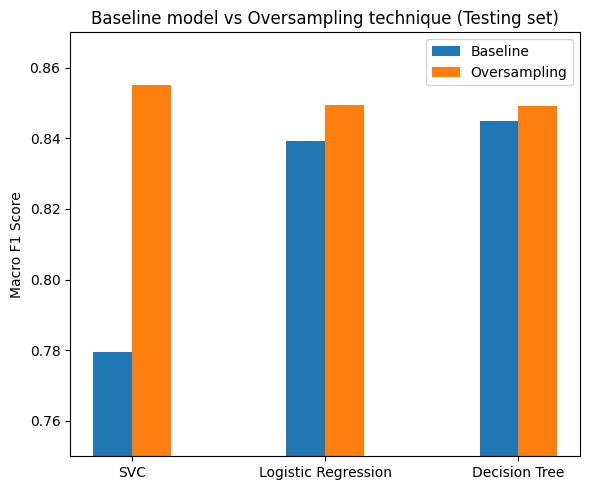

In [43]:
x, width = np.arange(3), 0.2

plt.figure(figsize=(6, 5))
plt.bar(x - width/2, [baseline_svc, baseline_logreg, baseline_dt], width, label='Baseline')
plt.bar(x + width/2, [os_svc, os_logreg, os_dt], width, label='Oversampling')

plt.ylabel('Macro F1 Score')
plt.title('Baseline model vs Oversampling technique (Testing set)')
plt.xticks(x,['SVC', 'Logistic Regression', 'Decision Tree'])
plt.ylim(0.75, 0.87)
plt.legend()
plt.tight_layout()
plt.show()

## Subtask (b):
## Class-weights technique

Class weights technique assigns different weights to each class during training. Minority class has fewer data-points, so class-weights ensure that the datapoints of minority class have more weightage while model is being learnt. Since minority class is under-represented during model training, we increase the penalty for misclassifying datapoints of minority class.

We can set class_weight as balanced or enter the weights manually.

### SVC

In [44]:
Xtrain_pca=pca.transform(X_train)
Xtest_pca=pca.transform(X_test)

In [45]:
svc=SVC(kernel='rbf', class_weight="balanced", random_state=42)
svc.fit(Xtrain_pca, y_train)

SVC(class_weight='balanced', random_state=42)

In [46]:
print("Performance on Training set:")
model_performance(svc, Xtrain_pca, y_train)

print("\nPerformance on Test set:")
cw_svc = model_performance(svc, Xtest_pca, y_test)

Performance on Training set:
F1 Score: 0.8725
Accuracy score: 0.9892
Recall score: 0.9798
Precision score: 0.8057

Performance on Test set:
F1 Score: 0.7867
Accuracy score: 0.9787
Recall score: 0.94
Precision score: 0.7155


### Logistic Regression

In [47]:
log_reg=LogisticRegression(solver='lbfgs', class_weight={"neg":2,"pos":5}, max_iter=500, random_state = 42)
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight={'neg': 2, 'pos': 5}, max_iter=500,
                   random_state=42)

In [48]:
print("Performance on Training set:")
model_performance(log_reg, X_train, y_train)

print("\nPerformance on Test set:")
cw_logreg = model_performance(log_reg, X_test, y_test)

Performance on Training set:
F1 Score: 0.8848
Accuracy score: 0.9925
Recall score: 0.8843
Precision score: 0.8853

Performance on Test set:
F1 Score: 0.8454
Accuracy score: 0.9892
Recall score: 0.8692
Precision score: 0.8246


### Decision tree

In [49]:
dec_tree=DecisionTreeClassifier(random_state=42, class_weight={'neg': 3, 'pos':10})
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={'neg': 3, 'pos': 10}, random_state=42)

In [50]:
print("Performance on Training set:")
model_performance(dec_tree, X_train, y_train)

print("\nPerformance on Test set:")
cw_dt = model_performance(dec_tree, X_test, y_test)

Performance on Training set:
F1 Score: 1.0
Accuracy score: 1.0
Recall score: 1.0
Precision score: 1.0

Performance on Test set:
F1 Score: 0.8513
Accuracy score: 0.9901
Recall score: 0.8573
Precision score: 0.8455


### Comparing `class_weight` technique with the baseline models

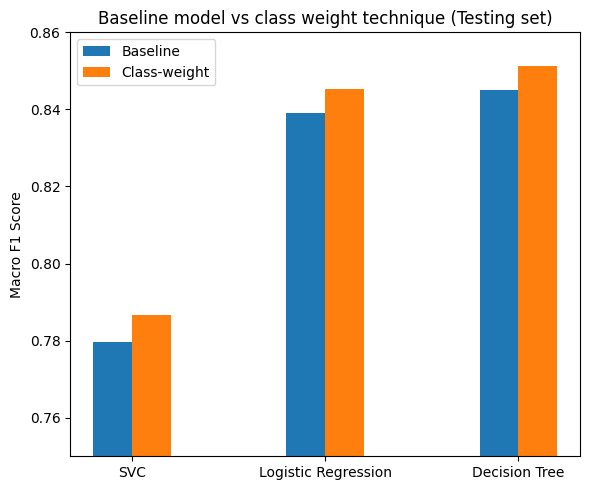

In [51]:
x, width = np.arange(3), 0.2

plt.figure(figsize=(6, 5))
plt.bar(x - width/2, [baseline_svc, baseline_logreg, baseline_dt], width, label='Baseline')
plt.bar(x + width/2, [cw_svc, cw_logreg, cw_dt], width, label='Class-weight')

plt.ylabel('Macro F1 Score')
plt.title('Baseline model vs class weight technique (Testing set)')
plt.xticks(x,['SVC', 'Logistic Regression', 'Decision Tree'])
plt.ylim(0.75, 0.86)
plt.legend()
plt.tight_layout()
plt.show()

### Subtask (c):
### `Sample_weights` technique

This technique allows us to assign a custom weight to each individual sample. Samples from the minority class are given higher weights to make them contribute more during training, because there are fewer samples of minority class. This helps to improve the performance of the model on imbalanced datasets by focusing more on the minority class during training.

### SVC

In [52]:
weights = {'neg': 2, 'pos': 5}

sample_weights = np.array([weights[class_] for class_ in y_train])

In [53]:
svc = SVC(random_state=42)
svc.fit(Xtrain_pca, y_train, sample_weight=sample_weights)


SVC(random_state=42)

In [54]:
print("Performance on Training set:")
model_performance(svc, Xtrain_pca, y_train)

print("\nPerformance on Test set:")
sw_svc = model_performance(svc, Xtest_pca, y_test)

Performance on Training set:
F1 Score: 0.9653
Accuracy score: 0.9978
Recall score: 0.9479
Precision score: 0.9842

Performance on Test set:
F1 Score: 0.813
Accuracy score: 0.9896
Recall score: 0.7661
Precision score: 0.881


### Logistic Regression

In [55]:
weights = {'neg': 0.5, 'pos':1.2}
sample_weights = np.array([weights[class_] for class_ in y_train])

In [56]:
log_reg = LogisticRegression(solver='lbfgs', random_state=42, max_iter = 500)
log_reg.fit(X_train, y_train, sample_weight=sample_weights)

LogisticRegression(max_iter=500, random_state=42)

In [57]:
print("Performance on Training set:")
model_performance(log_reg, X_train, y_train)

print("\nPerformance on Test set:")
sw_logreg = model_performance(log_reg, X_test, y_test)

Performance on Training set:
F1 Score: 0.8855
Accuracy score: 0.9926
Recall score: 0.8807
Precision score: 0.8903

Performance on Test set:
F1 Score: 0.8535
Accuracy score: 0.9898
Recall score: 0.8744
Precision score: 0.835


### Decision tree

In [58]:
weights = {'neg': 2, 'pos': 5}
sample_weights = np.array([weights[class_] for class_ in y_train])

In [59]:
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train, sample_weight=sample_weights)

DecisionTreeClassifier(random_state=42)

In [60]:
print("Performance on Training set:")
model_performance(dec_tree, X_train, y_train)

print("\nPerformance on Test set:")
sw_dt = model_performance(dec_tree, X_test, y_test)

Performance on Training set:
F1 Score: 1.0
Accuracy score: 1.0
Recall score: 1.0
Precision score: 1.0

Performance on Test set:
F1 Score: 0.8595
Accuracy score: 0.9906
Recall score: 0.8674
Precision score: 0.8519


### Comparing `sample_weights` technique with the baseline models

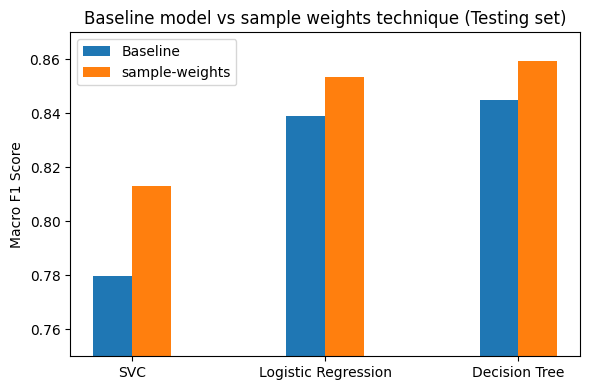

In [61]:
x, width = np.arange(3), 0.2

plt.figure(figsize=(6, 4))
plt.bar(x - width/2, [baseline_svc, baseline_logreg, baseline_dt], width, label='Baseline')
plt.bar(x + width/2, [sw_svc, sw_logreg, sw_dt], width, label='sample-weights')

plt.ylabel('Macro F1 Score')
plt.title('Baseline model vs sample weights technique (Testing set)')
plt.xticks(x,['SVC', 'Logistic Regression', 'Decision Tree'])
plt.ylim(0.75, 0.87)
plt.legend()
plt.tight_layout()
plt.show()

### Subtask (d): Creative ways to address class-imbalance
### Combining oversampling and `class_weight` technique

We try to combine oversampling and `class_weight` technique and try to improve the macro F1 score. We oversample the minority class using `SMOTE` and then apply custom `class_weight`, assigning higher weights to minority class, to improve model performance.

### SVC

In [62]:
smote = SMOTE(random_state=42, sampling_strategy=0.10)
Xtrain_os, ytrain_os = smote.fit_resample(X_train, y_train)

In [63]:
Xtrain_pca=pca.transform(Xtrain_os)
Xtest_pca=pca.transform(X_test)

In [64]:
svc = SVC(**grid_svc.best_params_,class_weight={'neg':2.5, 'pos':6}, random_state=42)
svc.fit(Xtrain_pca, ytrain_os)

SVC(class_weight={'neg': 2.5, 'pos': 6}, random_state=42)

In [65]:
print("Performance on Training set:")
model_performance(svc, Xtrain_pca, ytrain_os)

print("\nPerformance on Test set:")
comb_svc = model_performance(svc, Xtest_pca, y_test)

Performance on Training set:
F1 Score: 0.9687
Accuracy score: 0.9898
Recall score: 0.9646
Precision score: 0.9729

Performance on Test set:
F1 Score: 0.8256
Accuracy score: 0.9868
Recall score: 0.8753
Precision score: 0.788


### Logistic Regression

In [66]:
smote = SMOTE(random_state=42, sampling_strategy=0.04)
Xtrain_os, ytrain_os = smote.fit_resample(X_train, y_train)

In [67]:
log_reg = LogisticRegression(solver = "liblinear", C = 0.02, penalty = 'l2',class_weight={'neg':0.7, 'pos':1.1}, random_state=42, max_iter = 500)
log_reg.fit(Xtrain_os, ytrain_os)

LogisticRegression(C=0.02, class_weight={'neg': 0.7, 'pos': 1.1}, max_iter=500,
                   random_state=42, solver='liblinear')

In [68]:
print("Performance on Training set:")
model_performance(log_reg, Xtrain_os, ytrain_os)

print("\nPerformance on Test set:")
comb_logreg = model_performance(log_reg, X_test, y_test)

Performance on Training set:
F1 Score: 0.9068
Accuracy score: 0.9868
Recall score: 0.8889
Precision score: 0.9266

Performance on Test set:
F1 Score: 0.8515
Accuracy score: 0.9892
Recall score: 0.8913
Precision score: 0.8194


### Decision Tree

In [69]:
smote = SMOTE(random_state=42, sampling_strategy=0.02)
Xtrain_os, ytrain_os = smote.fit_resample(X_train, y_train)

In [70]:
dec_tree = DecisionTreeClassifier(**grid_dectree.best_params_,class_weight={'neg':0.4, 'pos':0.6}, random_state=42)
dec_tree.fit(Xtrain_os, ytrain_os)

DecisionTreeClassifier(class_weight={'neg': 0.4, 'pos': 0.6}, max_depth=30,
                       min_samples_leaf=5, random_state=42)

In [71]:
print("Performance on Training set:")
model_performance(dec_tree, Xtrain_os, ytrain_os)

print("\nPerformance on Test set:")
comb_dt = model_performance(dec_tree, X_test, y_test)

Performance on Training set:
F1 Score: 0.9501
Accuracy score: 0.9962
Recall score: 0.9456
Precision score: 0.9546

Performance on Test set:
F1 Score: 0.8617
Accuracy score: 0.9907
Recall score: 0.8724
Precision score: 0.8517


### Comparing the combination of oversampling and `class_weight` technique with baseline models

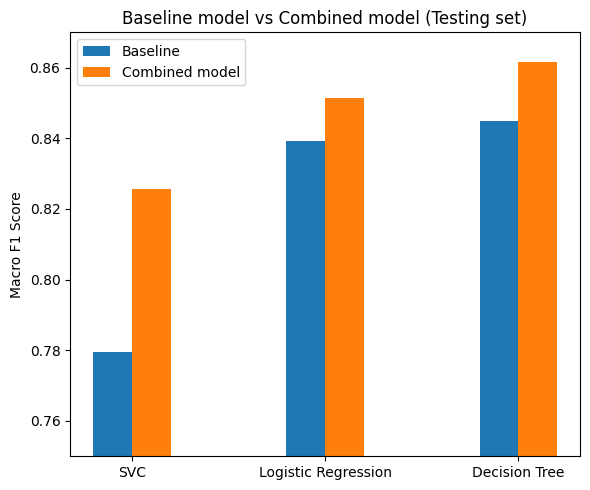

In [72]:
x, width = np.arange(3), 0.2

plt.figure(figsize=(6, 5))
plt.bar(x - width/2, [baseline_svc, baseline_logreg, baseline_dt], width, label='Baseline')
plt.bar(x + width/2, [comb_svc, comb_logreg, comb_dt], width, label='Combined model')

plt.ylabel('Macro F1 Score')
plt.title('Baseline model vs Combined model (Testing set)')
plt.xticks(x,['SVC', 'Logistic Regression', 'Decision Tree'])
plt.ylim(0.75, 0.87)
plt.legend()
plt.tight_layout()
plt.show()

## Summary

In [73]:
data = {"Baseline": [baseline_svc, baseline_logreg,baseline_dt], 'Oversampling': [os_svc, os_logreg, os_dt], 'Class-weights': [cw_svc, cw_logreg, cw_dt], 
    'Sample-weights': [sw_svc, sw_logreg, sw_dt], "Combined model": [comb_svc, comb_logreg, comb_dt] }
f1scores = pd.DataFrame(data, index=["SVC", "Logistic Regression", "Decision Tree"])
f1scores


,Baseline,Oversampling,Class-weights,Sample-weights,Combined model
SVC,0.7796,0.8550,0.7867,0.8130,0.8256
Logistic Regression,0.8391,0.8493,0.8454,0.8535,0.8515
Decision Tree,0.8450,0.8492,0.8513,0.8595,0.8617


####  From the above table, it is clear that the macro average F1 score of the hacked classifiers is better than the baseline classifier models